In [26]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import h5py
import math as m
from pathlib import Path
from scipy.io import FortranFile
from sklearn.linear_model import LinearRegression
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')
#from PyPDF2 import PdfFileMerger
#from PyPDF2 import PdfFileReader

#===========================================================================================

def get_constants(path,filename):
    
    if filename == 'gammaPI_vz_r0': 
        time = np.loadtxt(path+filename+'.csv',usecols=0)
        var = np.loadtxt(path+filename+'.csv', usecols=(1,2,3))
        sigmavar = np.loadtxt(path+'sigma_'+filename+'.csv', usecols=(1,2,3))
        var = np.swapaxes(var,0,1)
        sigmavar = np.swapaxes(sigmavar,0,1)
            
    else:
        time = np.loadtxt(path+filename+'.csv',usecols=0)
        var = np.loadtxt(path+filename+'.csv', usecols=(1,2,3,4,5,6))
        sigmavar = np.loadtxt(path+'sigma_'+filename+'.csv', usecols=(1,2,3,4,5,6))
        var = np.swapaxes(var,0,1)
        sigmavar = np.swapaxes(sigmavar,0,1)
        
    return var, sigmavar,time

#===========================================================================================
    
def plot_constants(plotsdir, t0, lent, tfinal, alphaR, ealphaR, betaR, ebetaR, gammaR, egammaR, res,time):
        
    t10 = np.linspace(0,tfinal*10,lent)
    index = np.where(t10 == t0*10)
    ind = int(index[0])
    
   # ind = int(index-1)
    
    alphaR = alphaR[:,ind:]
    ealphaR = ealphaR[:,ind:]
    betaR = betaR[:,ind:]
    ebetaR = ebetaR[:,ind:]
    gammaR = gammaR[:,ind:]
    egammaR = egammaR[:,ind:]
    
    t = time[ind:]
        
    fig, axs = plt.subplots(1,2,sharex = 'all',sharey = False, figsize = (12,4))
    plt.subplots_adjust(hspace = 0.1,wspace = 0.3)
    
    #fig.tight_layout(pad=1.0)
    
    ax1 = axs[0]
    ax3 = axs[1]
    
    ax1.tick_params(axis='x',labelsize = 18)   
    ax3.tick_params(axis='x',labelsize = 18)
    
    ax1.tick_params(axis='y',labelsize = 18)
    ax3.tick_params(axis='y',labelsize = 18)

        
#    for ax in axs.flat:
#        ax.label_outer()
        
    ax1.plot(t, alphaR[0,:], linestyle = 'solid', color = 'darkorchid', label = r'$\alpha_{\rm{R},rr}$')
    ax1.fill_between(t, alphaR[0,:]-ealphaR[0,:], alphaR[0,:]+ealphaR[0,:], color = 'darkorchid', alpha = 0.2)
    ax1.plot(t, alphaR[3,:], linestyle = 'dashed' , color = 'darkcyan', label = r'$\alpha_{\rm{R},\phi\phi}$')
    ax1.fill_between(t, alphaR[3,:]-ealphaR[3,:], alphaR[3,:]+ealphaR[3,:], color='darkcyan', alpha = 0.2)
    ax1.plot(t, alphaR[5,:], linestyle = 'dotted', color = 'darkorange', label = r'$\alpha_{\rm{R},zz}$')
    ax1.fill_between(t, alphaR[5,:]-ealphaR[5,:], alphaR[5,:]+ealphaR[5,:], color='darkorange', alpha = 0.2)
    ax1.set_xlabel('Time [ms]', fontsize = 20)
    ax1.set_ylabel(r'$\alpha_{ij}$', fontsize = 20)
    ax1.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
    ax1.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)
    ax1.set_xlim([5,30])
    ax1.set_ylim([-30,70])
    
    ax3.plot(t, betaR[0,:], linestyle = 'solid', color = 'darkorchid', label = r'$rr$')
    ax3.fill_between(t, betaR[0,:]-ebetaR[0,:], betaR[0,:]+ebetaR[0,:], color = 'darkorchid', alpha = 0.2)
    ax3.plot(t, betaR[3,:], linestyle = 'dashed' , color = 'darkcyan', label = r'$\phi\phi$')
    ax3.fill_between(t, betaR[3,:]-ebetaR[3,:], betaR[3,:]+ebetaR[3,:], color='darkcyan', alpha = 0.2)
    ax3.plot(t, betaR[5,:], linestyle = 'dotted', color = 'darkorange', label = r'$zz$')
    ax3.fill_between(t, betaR[5,:]-ebetaR[5,:], betaR[5,:]+ebetaR[5,:], color='darkorange', alpha = 0.2)
    ax3.set_xlabel('Time [ms]', fontsize = 20)
    ax3.set_ylabel(r'$\beta_{ij}$', fontsize = 20)
    ax3.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
    ax3.legend(bbox_to_anchor=(1.4,0.7), ncol = 1, frameon = 'True',prop={"size":19})
    ax3.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)
    ax3.set_xlim([5,30])
    ax3.set_ylim([-10,15])
 #   plt.savefig('/home/miquelmiravet/Desktop/figs_mri/diag-coeffs_MRI-H1.pdf',bbox_inches='tight')

   
    fig, ax = plt.subplots(1,3,sharex = False,sharey = False, figsize = (18,4))
    plt.subplots_adjust(hspace = 0.1,wspace = 0.3)
    
    ax2 = ax[0]
    ax4 = ax[1]
    ax5 = ax[2]
    
    
    ax5.tick_params(axis='x',labelsize = 18)
    ax2.tick_params(axis='x',labelsize = 18)
    ax4.tick_params(axis='x',labelsize = 18)
    ax2.tick_params(axis='y',labelsize = 18)
    ax4.tick_params(axis='y',labelsize = 18)
    ax5.tick_params(axis='y',labelsize = 18)

    ax5.plot(t, gammaR[1,:], linestyle = 'solid', color = 'darkorchid', label = r'$rz$')
    ax5.fill_between(t, gammaR[1,:]-egammaR[1,:], gammaR[1,:]+egammaR[1,:], color='darkorchid', alpha = 0.2)
    ax5.plot(t, gammaR[0,:], linestyle = 'dashed', color = 'darkcyan', label = r'$r\phi$')
    ax5.fill_between(t, gammaR[0,:]-egammaR[0,:], gammaR[0,:]+egammaR[0,:], color = 'darkcyan', alpha = 0.2)
    ax5.plot(t, gammaR[2,:], linestyle = 'dotted', color = 'darkorange', label = r'$\phi z$')
    ax5.fill_between(t, gammaR[2,:]-egammaR[2,:], gammaR[2,:]+egammaR[2,:], color='darkorange', alpha = 0.2)
    ax5.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)
    ax5.set_ylim([-30,30])
    ax5.set_xlim([1,12])


    ax2.plot(t, alphaR[2,:], linestyle = 'solid', color = 'darkorchid', label = r'$\alpha_{\rm{R},rz}$')
    ax2.fill_between(t, alphaR[2,:]-ealphaR[2,:], alphaR[2,:]+ealphaR[2,:], color='darkorchid', alpha = 0.2)
    ax2.plot(t, alphaR[1,:], linestyle = 'dashed', color = 'darkcyan', label = r'$\alpha_{\rm{R},r\phi}$')
    ax2.fill_between(t, alphaR[1,:]-ealphaR[1,:], alphaR[1,:]+ealphaR[1,:], color='darkcyan', alpha = 0.2)
    ax2.plot(t, alphaR[4,:], linestyle = 'dotted', color = 'darkorange', label = r'$\alpha_{\rm{R},\phi z}$')
    ax2.fill_between(t, alphaR[4,:]-ealphaR[4,:], alphaR[4,:]+ealphaR[4,:], color='darkorange', alpha = 0.2)
    ax2.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)#
    ax2.set_ylim([-20,20])
    ax2.set_xlim([5,30])
    
    ax4.plot(t, betaR[2,:], linestyle = 'solid', color = 'darkorchid', label = r'$\beta_{\rm{R},rz}$')
    ax4.fill_between(t, betaR[2,:]-ebetaR[2,:], betaR[2,:]+ebetaR[2,:], color='darkorchid', alpha = 0.2)
    ax4.plot(t, betaR[1,:], linestyle = 'dashed', color = 'darkcyan', label = r'$\beta_{\rm{R},r\phi}$')
    ax4.fill_between(t, betaR[1,:]-ebetaR[1,:], betaR[1,:]+ebetaR[1,:], color='darkcyan', alpha = 0.2)
    ax4.plot(t, betaR[4,:], linestyle = 'dotted', color = 'darkorange', label = r'$\beta_{\rm{R},\phi z}$')
    ax4.fill_between(t, betaR[4,:]-ebetaR[4,:], betaR[4,:]+ebetaR[4,:], color='darkorange', alpha = 0.2)
    ax4.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)
    ax4.set_ylim([-12,7])
    ax4.set_xlim([5,30])

    ax2.set_xlabel('Time [ms]', fontsize = 20)
    ax2.set_ylabel(r'$\alpha_{ij}$', fontsize = 20)
    #ax2.set_ylim((2,-1))
    ax2.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
    ax4.set_xlabel('Time [ms]', fontsize = 20)
    ax4.set_ylabel(r'$\beta_{ij}$', fontsize = 20)
    #ax2.set_ylim((2,-1))
    ax4.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
    ax5.set_xlabel('Time [ms]', fontsize = 20)
    ax5.set_ylabel(r'$\gamma_{ij}$',fontsize = 20)
    ax5.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
    #plt.yscale('symlog')
    ax5.legend(bbox_to_anchor=(1.45,0.7), ncol = 1, frameon = 'True',prop={"size":20})
  
  #  plt.savefig('/home/miquelmiravet/Desktop/figs_mri/non-diag-coeffs_MRI-H1.pdf',bbox_inches='tight')

    
    return()
            
#===========================================================================================

#===========================================================================================

def main():
    
    lent = 61
    tfinal = 30
    t_0 = 1
    resu = ['100_400_100','60_240_60','76_304_76']    
    #for j in range(0,3):
    
    j = 0
    
    if j==0:
        
        print('RESOLUTION : ',resu[j])
        
        filesdir = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_'+resu[j]+'/surface_av/b0z-4.6e13/v2/'

        plotsdir = filesdir+'plots-new'
        
        try:
            os.makedirs(plotsdir)
        except OSError as error:
            print(error)

        lentit = lent
        tfinalit = tfinal
        t0it = t_0
        
       
        #constants:
        
        alphaR, ealphaR,time = get_constants(filesdir,'alphaPI_vz_r0')
        
        betaR, ebetaR,time = get_constants(filesdir,'betaPI_vz_r0')

        gammaR, egammaR,time = get_constants(filesdir,'gammaPI_vz_r0')
        
    
        
        #plots:
        
        plot_constants(plotsdir,t0it,lentit, tfinalit, alphaR, ealphaR, betaR, ebetaR, gammaR, egammaR, resu[j],time)
        
    return gammaR, betaR, alphaR
    


RESOLUTION :  100_400_100
[Errno 17] File exists: '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_100_400_100/surface_av/b0z-4.6e13/v2/plots-new'


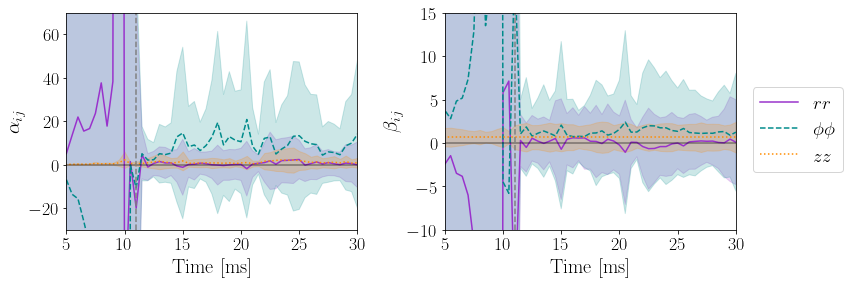

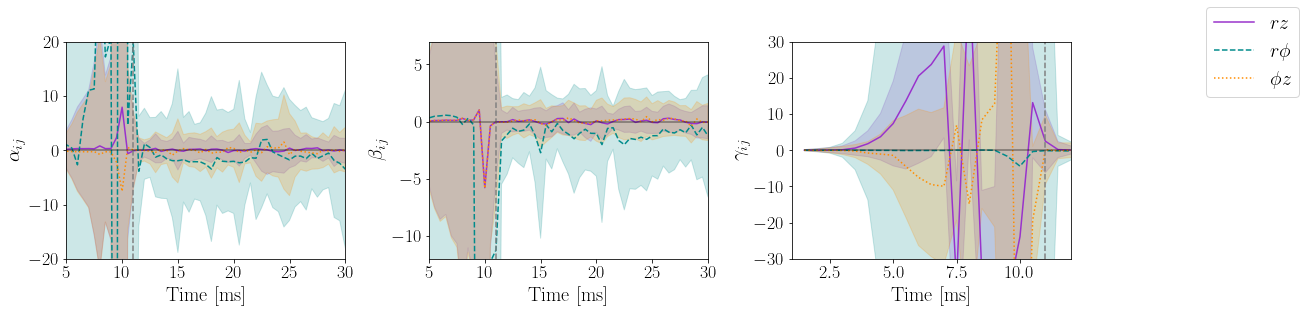

In [27]:
gamma, beta, alpha = main()

In [19]:
filesdir = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_100_400_100/surface_av/b0z-4.6e13/v2'

alpha_av = np.loadtxt(filesdir+'/alphaPI_vz_r0_av.txt')
ealpha_av = np.loadtxt(filesdir+'/sigma_alphaPI_vz_r0_av.txt')
beta_av = np.loadtxt(filesdir+'/betaPI_vz_r0_av.txt')
ebeta_av = np.loadtxt(filesdir+'/sigma_betaPI_vz_r0_av.txt')
gamma_av = np.loadtxt(filesdir+'/gammaPI_vz_r0_av.txt')
egamma_av = np.loadtxt(filesdir+'/sigma_gammaPI_vz_r0_av.txt')
coord = ['rr','rphi','rz','phiphi','phiz','zz']

for i in range(0,6):
    print('alpha_ %s = %.3f +- %.3f'%(coord[i],alpha_av[i],ealpha_av[i]))
print('*'*60)
for i in range(0,6):
    print('beta_ %s = %.3f +- %.3f'%(coord[i],beta_av[i],ebeta_av[i]))
print('*'*60)

coord2 =['rphi','rz','phiz']
    
for i in range(0,3):
    print('gamma_ %s = %.3f +- %.3f'%(coord2[i],gamma_av[i],egamma_av[i]))
print('*'*60)    


alpha_ rr = 0.465 +- 1.206
alpha_ rphi = -1.411 +- 1.481
alpha_ rz = 0.056 +- 0.343
alpha_ phiphi = 7.320 +- 3.162
alpha_ phiz = -0.098 +- 0.583
alpha_ zz = 0.847 +- 0.378
************************************************************
beta_ rr = 0.076 +- 0.546
beta_ rphi = -0.821 +- 0.580
beta_ rz = 0.026 +- 0.181
beta_ phiphi = 1.174 +- 0.813
beta_ phiz = 0.074 +- 0.255
beta_ zz = 0.667 +- 0.260
************************************************************
gamma_ rphi = 0.082 +- 0.761
gamma_ rz = 0.085 +- 0.300
gamma_ phiz = -0.139 +- 0.467
************************************************************


In [25]:
filesdir = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_100_400_100/surface_av/b0z-4.6e13/v2/'

alpha_av = np.loadtxt(filesdir+'/alphaPI_r0_av.txt')
ealpha_av = np.loadtxt(filesdir+'/sigma_alphaPI_r0_av.txt')
beta_av = np.loadtxt(filesdir+'/betaPI_r0_av.txt')
ebeta_av = np.loadtxt(filesdir+'/sigma_betaPI_r0_av.txt')
gamma_av = np.loadtxt(filesdir+'/gammaPI_vr_r0_av.txt')
egamma_av = np.loadtxt(filesdir+'/sigma_gammaPI_vr_r0_av.txt')
coord = ['rr','rphi','rz','phiphi','phiz','zz']

for i in range(0,6):
    print('alpha_ %s = %.3f +- %.3f'%(coord[i],alpha_av[i],ealpha_av[i]))
print('*'*60)
for i in range(0,6):
    print('beta_ %s = %.3f +- %.3f'%(coord[i],beta_av[i],ebeta_av[i]))
print('*'*60)

coord2 =['rphi','rz','phiz']
    
for i in range(0,3):
    print('gamma_ %s = %.3f +- %.3f'%(coord2[i],gamma_av[i],egamma_av[i]))
print('*'*60)    

alpha_ rr = 0.465 +- 1.206
alpha_ rphi = -1.411 +- 1.481
alpha_ rz = 0.056 +- 0.343
alpha_ phiphi = 7.320 +- 3.162
alpha_ phiz = -0.098 +- 0.583
alpha_ zz = 0.847 +- 0.378
************************************************************
beta_ rr = 0.076 +- 0.546
beta_ rphi = -0.821 +- 0.580
beta_ rz = 0.026 +- 0.181
beta_ phiphi = 1.174 +- 0.813
beta_ phiz = 0.074 +- 0.255
beta_ zz = 0.667 +- 0.260
************************************************************
gamma_ rphi = 0.135 +- 1.126
gamma_ rz = -0.013 +- 0.383
gamma_ phiz = -0.053 +- 0.681
************************************************************


In [73]:
filesdir = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_60_240_60/surface_av/b0z-4.6e13/early_t'

alpha_av = np.loadtxt(filesdir+'/alphaR_r0_av.txt')
ealpha_av = np.loadtxt(filesdir+'/sigma_alphaR_r0_av.txt')
beta_av = np.loadtxt(filesdir+'/betaR_r0_av.txt')
ebeta_av = np.loadtxt(filesdir+'/sigma_betaR_r0_av.txt')
gamma_av = np.loadtxt(filesdir+'/gammaR_r0_av.txt')
egamma_av = np.loadtxt(filesdir+'/sigma_gammaR_r0_av.txt')
coord = ['rr','rphi','rz','phiphi','phiz','zz']

for i in range(0,6):
    print('alpha_ %s = %.3f +- %.3f'%(coord[i],alpha_av[i],ealpha_av[i]))
print('*'*60)
for i in range(0,6):
    print('beta_ %s = %.3f +- %.3f'%(coord[i],beta_av[i],ebeta_av[i]))
print('*'*60)

coord2 =['rphi','rz','phiz']
    
for i in range(0,3):
    print('gamma_ %s = %.3f +- %.3f'%(coord2[i],gamma_av[i],egamma_av[i]))
print('*'*60)    

alpha_ rr = 0.088 +- 0.024
alpha_ rphi = -0.121 +- 0.035
alpha_ rz = -0.002 +- 0.009
alpha_ phiphi = 0.321 +- 0.081
alpha_ phiz = 0.002 +- 0.016
alpha_ zz = 0.021 +- 0.008
************************************************************
beta_ rr = 0.504 +- 0.090
beta_ rphi = 0.193 +- 0.144
beta_ rz = -0.008 +- 0.064
beta_ phiphi = 1.209 +- 0.110
beta_ phiz = -0.013 +- 0.096
beta_ zz = 0.227 +- 0.055
************************************************************
gamma_ rphi = 0.011 +- 0.087
gamma_ rz = 0.002 +- 0.029
gamma_ phiz = -0.009 +- 0.053
************************************************************


In [46]:
filesdir = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_100_400_100/volume_av/b0z-2.76e13/'

alpha_av = np.loadtxt(filesdir+'/alphaR_r0_av.txt')
ealpha_av = np.loadtxt(filesdir+'/sigma_alphaR_r0_av.txt')
beta_av = np.loadtxt(filesdir+'/betaR_r0_av.txt')
ebeta_av = np.loadtxt(filesdir+'/sigma_betaR_r0_av.txt')
gamma_av = np.loadtxt(filesdir+'/gammaR_r0_av.txt')
egamma_av = np.loadtxt(filesdir+'/sigma_gammaR_r0_av.txt')
coord = ['rr','rphi','rz','phiphi','phiz','zz']

for i in range(0,6):
    print('alpha_ %s = %.3f +- %.3f'%(coord[i],alpha_av[i],ealpha_av[i]))
print('*'*60)
for i in range(0,6):
    print('beta_ %s = %.3f +- %.3f'%(coord[i],beta_av[i],ebeta_av[i]))
print('*'*60)

coord2 =['rphi','rz','phiz']
    
for i in range(0,3):
    print('gamma_ %s = %.3f +- %.3f'%(coord2[i],gamma_av[i],egamma_av[i]))
print('*'*60)   

OSError: /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_100_400_100/surface_av/b0z-2.76e13/v2//alphaPI_r0_av.txt not found.

In [59]:
def readh5files(file): 
    
    print('DATA FROM FILE:      ',file)
    hf = h5py.File(file, 'r')
  
    r = np.array(hf.get('radius'))
    phi = np.array(hf.get('phi'))
    z = np.array(hf.get('z'))
    rho = np.array(hf.get('rho'))
    vr = np.array(hf.get('vr'))
    vphi = np.array(hf.get('vphi'))
    vz = np.array(hf.get('vz'))
    Br = np.array(hf.get('br'))
    Bphi = np.array(hf.get('bphi'))
    Bz = np.array(hf.get('bz'))
      
    return [r,phi,z,Br.T, Bphi.T, Bz.T, vr.T, vphi.T, vz.T,rho.T]

def readstresses(arx):

    print('DATA FROM FILE:      ',arx)

    with h5py.File(arx, "r") as f:
    # List all groups
        print("Keys: %s" % f.keys())
        a_group_key = list(f.keys())
        for i in a_group_key:
            print(i)

        Fmean = np.array(f.get('Fmean'))
        Rmean = np.array(f.get('Rmean'))
        Mmean = np.array(f.get('Mmean'))
        time = np.array(f.get('time'))
        rho = np.array(f.get('rhomean'))
        
        M = np.array([Mmean[0,0],Mmean[0,1],Mmean[0,2], Mmean[1,1], Mmean[1,2], Mmean[2,2]])
        R = np.array([Rmean[0,0],Rmean[0,1],Rmean[0,2], Rmean[1,1], Rmean[1,2], Rmean[2,2]])
        F = np.array([Fmean[0,1], Fmean[0,2], Fmean[1,2]])
        
        eT = 0.5*rho*(R[0]+R[3]+R[5])
        f.close()

        print('Time           :',time,' ms')

    return [M, R, F, eT, rho]


def bvmean(r,phi,z,B,v):
    
    ind_r =  int(len(r)/2)
    
    r0 = r[ind_r]

    dphi = phi[1]-phi[0]
    dz = (z[1]-z[0])

    dS = r0*dphi*dz
    dSmatrix = dS*np.ones((len(phi),len(z)))
    S = np.sum(dSmatrix)
    
    var_dec = [B[0,ind_r],B[1,ind_r],B[2,ind_r],v[0,ind_r,ind_r],v[1,ind_r],v[2,ind_r]]
    meanvar=np.zeros(len(var_dec))
  
    for i in range(0,len(var_dec)):
        integrand = dS*var_dec[i]
        meanvar[i] = np.sum(integrand)/S
    
    return meanvar[:3], meanvar[3:]

In [60]:
path_mri = '/media/miquelmiravet/Maxtor1/MRI'
path_blow = path_mri+'/A100_400_100_B_2.76/'
path_bmed = path_mri+'/A100_400_100_B_3.45/'
path_bhigh = path_mri+'/A100_400_100_B_4.6e13_v_4.45d8_r_4.45d8_Lz_1.0_INTEL_stencil/'
path_lres = path_mri+'/A60_240_60_B_4.6e13_v_4.45d8_r_4.45d8_Lz_1.0_INTEL_stencil_flex/'
path_mres = path_mri+'/A76_304_76/outp-mri/'

path_stresses = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-3.45e13'

t = np.linspace(0,30,61)

v_blow = np.zeros((len(t),3))
v_bhigh = np.zeros((len(t),3))
v_bmed = np.zeros((len(t),3))

b_blow = np.zeros((len(t),3))
b_bhigh = np.zeros((len(t),3))
b_bmed = np.zeros((len(t),3))

rho_bhigh = np.zeros(len(t))


#print('LOW MAGNETIC FIELD: b_0z = 2.76e13 G')
#for i in range(0,len(t)):
#    arx = format(25*i, "08")
#    r,phi,z,Br, Bphi, Bz, vr, vphi, vz,rho = readh5files(path_blow+'/outp-mri/mri'+str(arx)+'.h5')
#    print('Time           : ',t[i])
    
#    b = np.array([Br,Bphi,Bz])
#    v = np.array([vr,vphi,vz])
    
#    b_blow[i], v_blow[i] = bvmean(r,phi,z,b,v)
    
#print('MEDIUM MAGNETIC FIELD: b_0z = 3.45e13 G')
#for i in range(0,len(t)):
#    arx = format(25*i, "08")
#    r,phi,z,Br, Bphi, Bz, vr, vphi, vz,rho = readh5files(path_bmed+'/outp-mri/mri'+str(arx)+'.h5')
#    print('Time           : ',t[i])
    
#    b = np.array([Br,Bphi,Bz])
#    v = np.array([vr,vphi,vz])
    
#    b_bmed[i], v_bmed[i] = bvmean(r,phi,z,b,v)
    
print('HIGH MAGNETIC FIELD: b_0z = 4.6e13 G')
for i in range(0,len(t)):
    arx = format(25*i, "04")
    r,phi,z,Br, Bphi, Bz, vr, vphi, vz,rho = readh5files(path_bhigh+'/mri-'+str(arx)+'.h5')  
    
    tempvar = readstresses(path_stresses+'/stresses_sigma_r0-'+arx+'.h5')
    rho_bhigh[i] = tempvar[-1]
    
    print('Time           : ',t[i])
    
    b = np.array([Br,Bphi,Bz])
    v = np.array([vr,vphi,vz])
    
    b_bhigh[i], v_bhigh[i] = bvmean(r,phi,z,b,v)  

HIGH MAGNETIC FIELD: b_0z = 4.6e13 G
DATA FROM FILE:       /media/miquelmiravet/Maxtor1/MRI/A100_400_100_B_4.6e13_v_4.45d8_r_4.45d8_Lz_1.0_INTEL_stencil//mri-0000.h5
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-3.45e13/stresses_sigma_r0-0000.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'r0', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
r0
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : 0.0  ms
Time           :  0.0
DATA FROM FILE:       /media/miquelmiravet/Maxtor1/MRI/A100_400_100_B_4.6e13_v_4.45d8_r_4.45d8_Lz_1.0_INTEL_stencil//mri-0025.h5
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-3.45e13/stresses_sigma_r0-0025.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rm

DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-3.45e13/stresses_sigma_r0-0350.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'r0', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
r0
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : 7.0  ms
Time           :  7.0
DATA FROM FILE:       /media/miquelmiravet/Maxtor1/MRI/A100_400_100_B_4.6e13_v_4.45d8_r_4.45d8_Lz_1.0_INTEL_stencil//mri-0375.h5
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-3.45e13/stresses_sigma_r0-0375.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'r0', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
r0
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_r

DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-3.45e13/stresses_sigma_r0-0700.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'r0', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
r0
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : 14.0  ms
Time           :  14.0
DATA FROM FILE:       /media/miquelmiravet/Maxtor1/MRI/A100_400_100_B_4.6e13_v_4.45d8_r_4.45d8_Lz_1.0_INTEL_stencil//mri-0725.h5
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-3.45e13/stresses_sigma_r0-0725.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'r0', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
r0
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma

DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-3.45e13/stresses_sigma_r0-1050.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'r0', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
r0
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : 21.0  ms
Time           :  21.0
DATA FROM FILE:       /media/miquelmiravet/Maxtor1/MRI/A100_400_100_B_4.6e13_v_4.45d8_r_4.45d8_Lz_1.0_INTEL_stencil//mri-1075.h5
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-3.45e13/stresses_sigma_r0-1075.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'r0', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
r0
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma

DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-3.45e13/stresses_sigma_r0-1400.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'r0', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
r0
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : 28.0  ms
Time           :  28.0
DATA FROM FILE:       /media/miquelmiravet/Maxtor1/MRI/A100_400_100_B_4.6e13_v_4.45d8_r_4.45d8_Lz_1.0_INTEL_stencil//mri-1425.h5
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-3.45e13/stresses_sigma_r0-1425.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'r0', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
r0
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma

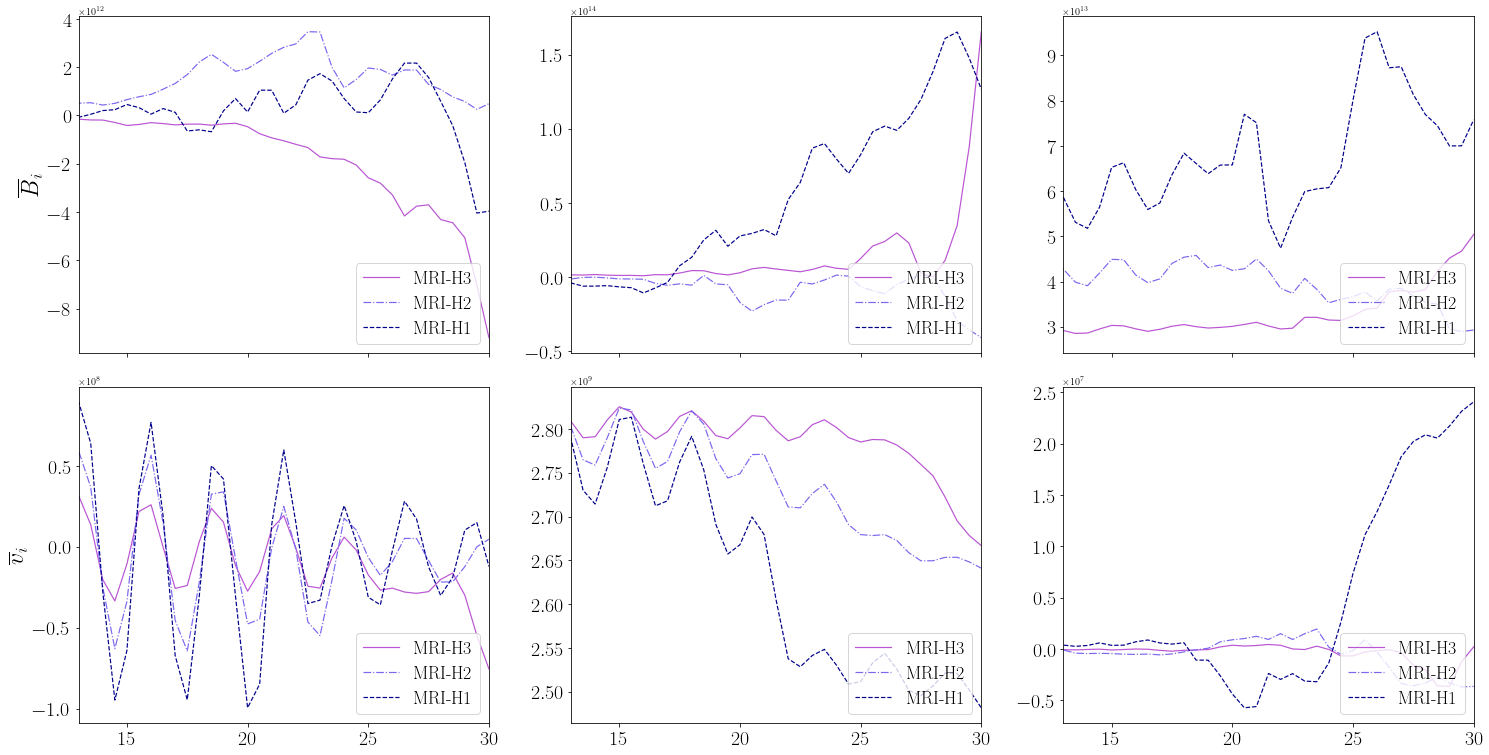

In [6]:
#plots magnetic energy
t = np.linspace(0,30,61)

fig, ax = plt.subplots(2,3,sharex = 'all',sharey='none',figsize = (25,13))

plt.subplots_adjust(hspace = 0.1) 
plt.subplots_adjust(wspace = 0.2) 

#energ_blow2 = energ_blow-energ_blow[0]
#energ_bmed2 = energ_bmed-energ_bmed[0]
#energ_bhigh2 = energ_bhigh-energ_bhigh[0]
#energ_rlow2 = energ_rlow-energ_rlow[0]
#energ_rmed2 = energ_rmed-energ_rmed[0]


for i in range(0,2):
    for j in range(0,3):
        ax[i,j].tick_params(axis='y',labelsize = 20)
        ax[i,j].tick_params(axis='x',labelsize = 20)

ax[0,0].plot(t[5:],b_blow[5:,0], linewidth = 1.2, linestyle = 'solid', color = 'mediumorchid', label = r'MRI-H3')
ax[0,0].plot(t[5:],b_bmed[5:,0], linewidth = 1.2, linestyle = 'dashdot', color = 'mediumslateblue', label = r'MRI-H2')
ax[0,0].plot(t[5:],b_bhigh[5:,0], linewidth = 1.2, linestyle = 'dashed', color = 'darkblue', label = r'MRI-H1')

#ax[0,0].text(26,5e24,r'$e^{\rm mag}_{r}$', fontsize = 26)
ax[0,0].set_ylabel(r'$\overline{B}_i$', fontsize = 24)
#ax[0,0].set_xlabel('Time', fontsize = 15)
#ax[0,0].set_yscale('log')
ax[0,0].set_xlim([13,30])
#ax[0,0].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[0].set_xscale('log')
ax[0,0].legend(loc = 'lower right', fontsize = 18)

ax[1,0].plot(t[5:],v_blow[5:,0], linewidth = 1.2, linestyle = 'solid', color = 'mediumorchid', label = r'MRI-H3')
ax[1,0].plot(t[5:],v_bmed[5:,0], linewidth = 1.2, linestyle = 'dashdot', color = 'mediumslateblue', label = r'MRI-H2')
ax[1,0].plot(t[5:],v_bhigh[5:,0], linewidth = 1.2, linestyle = 'dashed', color = 'darkblue', label = r'MRI-H1')

#ax[0,0].text(26,5e24,r'$e^{\rm mag}_{r}$', fontsize = 26)
ax[1,0].set_ylabel(r'$\overline{v}_i$', fontsize = 24)
#ax[0,0].set_xlabel('Time', fontsize = 15)
#ax[0,0].set_yscale('log')
ax[1,0].set_xlim([13,30])
#ax[0,0].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[0].set_xscale('log')
ax[1,0].legend(loc = 'lower right', fontsize = 18)

ax[0,1].plot(t[5:],b_blow[5:,1], linewidth = 1.2, linestyle = 'solid', color = 'mediumorchid', label = r'MRI-H3')
ax[0,1].plot(t[5:],b_bmed[5:,1], linewidth = 1.2, linestyle = 'dashdot', color = 'mediumslateblue', label = r'MRI-H2')
ax[0,1].plot(t[5:],b_bhigh[5:,1], linewidth = 1.2, linestyle = 'dashed', color = 'darkblue', label = r'MRI-H1')
ax[0,1].legend(loc = 'lower right', fontsize = 18)

ax[1,1].plot(t[5:],v_blow[5:,1], linewidth = 1.2, linestyle = 'solid', color = 'mediumorchid', label = r'MRI-H3')
ax[1,1].plot(t[5:],v_bmed[5:,1], linewidth = 1.2, linestyle = 'dashdot', color = 'mediumslateblue', label = r'MRI-H2')
ax[1,1].plot(t[5:],v_bhigh[5:,1], linewidth = 1.2, linestyle = 'dashed', color = 'darkblue', label = r'MRI-H1')
ax[1,1].legend(loc = 'lower right', fontsize = 18)

ax[0,2].plot(t[5:],b_blow[5:,2], linewidth = 1.2, linestyle = 'solid', color = 'mediumorchid', label = r'MRI-H3')
ax[0,2].plot(t[5:],b_bmed[5:,2], linewidth = 1.2, linestyle = 'dashdot', color = 'mediumslateblue', label = r'MRI-H2')
ax[0,2].plot(t[5:],b_bhigh[5:,2], linewidth = 1.2, linestyle = 'dashed', color = 'darkblue', label = r'MRI-H1')
ax[0,2].legend(loc = 'lower right', fontsize = 18)

ax[1,2].plot(t[5:],v_blow[5:,2], linewidth = 1.2, linestyle = 'solid', color = 'mediumorchid', label = r'MRI-H3')
ax[1,2].plot(t[5:],v_bmed[5:,2], linewidth = 1.2, linestyle = 'dashdot', color = 'mediumslateblue', label = r'MRI-H2')
ax[1,2].plot(t[5:],v_bhigh[5:,2], linewidth = 1.2, linestyle = 'dashed', color = 'darkblue', label = r'MRI-H1')
ax[1,2].legend(loc = 'lower right', fontsize = 18)


#plt.savefig('/home/miquelmiravet/Desktop/figs_mri/mri_energy_mag_comp.pdf',bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


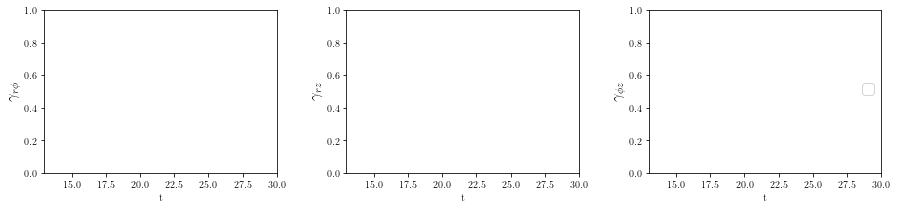

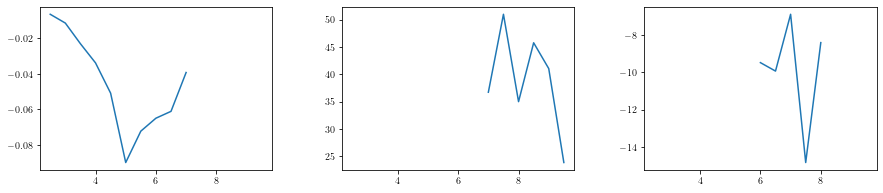

In [12]:
#vb = (v_bhigh[26:,0]*b_bhigh[26:,1]-v_bhigh[26:,1]*b_bhigh[26:,0])/(rho_bhigh[26:]**(0.5)*(2.99792458e10)**2)

t = np.linspace(0,30,61)

fig, ax = plt.subplots(1,3, sharex = 'all', figsize = (15,3))
plt.subplots_adjust(wspace = 0.3) 

#ax[0].plot(t[26:], gamma[0,25:]/np.amax(gamma[0,25:]), label = 'num', color = 'r')
#ax[1].plot(t[26:], gamma[1,25:]/np.amax(gamma[1,25:]), label = 'num', color = 'r')
#ax[2].plot(t[26:], gamma[2,25:]/np.amax(gamma[2,25:]), label = 'num', color = 'r')
#ax[0].plot(t[26:], vb[:])
#ax[1].plot(t[26:], vb[:])
#ax[2].plot(t[26:], vb[:])

#ax[0].plot(t[26:], gamma[0,25:]/v, linestyle= 'dashed')
#ax[1].plot(t[26:], gamma[1,25:]/v, linestyle= 'dashed')
#ax[2].plot(t[26:], gamma[2,25:]/v, linestyle= 'dashed')
ax[0].set_ylabel(r'$\gamma_{r\phi}$', fontsize = 15)
ax[1].set_ylabel(r'$\gamma_{rz}$', fontsize = 15)
ax[2].set_ylabel(r'$\gamma_{\phi z}$', fontsize = 15)
ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[2].set_xlabel('t')
ax[0].set_xlim([13,30])
#ax[0].set_ylim([-5,5])
ax[2].legend(bbox_to_anchor = (1,0.6), fontsize = 15)

fig, ax = plt.subplots(1,3, sharex = 'all', figsize = (15,3))
plt.subplots_adjust(wspace = 0.3) 

ax[0].plot(t[5:15], gamma[0,5:15])
ax[1].plot(t[14:20], gamma[1,14:20])
ax[2].plot(t[12:17], gamma[2,12:17])

#ax[0].set_ylabel(r'$\gamma_{r\phi}$/v', fontsize = 15)
#ax[1].set_ylabel(r'$\gamma_{rz}$/v', fontsize = 15)
#ax[2].set_ylabel(r'$\gamma_{\phi z}$/v', fontsize = 15)
#ax[0].set_xlabel('t')
#ax[1].set_xlabel('t')
#ax[2].set_xlabel('t')
#ax[0].set_xlim([13,30])
#ax[0].set_ylim([-10,10])
#ax[1].set_ylim([-10,10])
#ax[2].set_ylim([-10,10])
#ax[2].legend(bbox_to_anchor = (1,0.6), fontsize = 15)


(-10.0, 10.0)

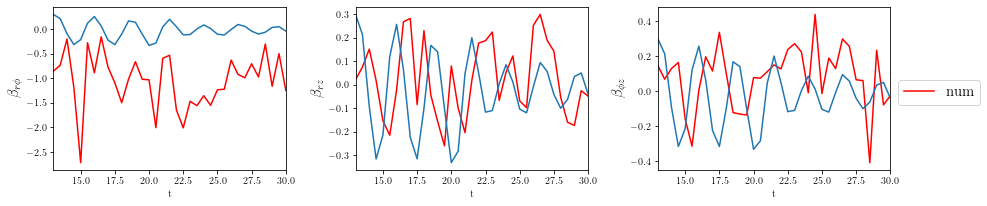

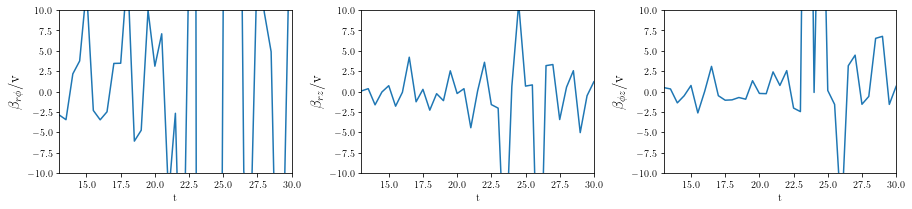

In [12]:
fig, ax = plt.subplots(1,3, sharex = 'all', figsize = (15,3))
plt.subplots_adjust(wspace = 0.3) 

ax[0].plot(t[26:], beta[1,25:], label = 'num', color = 'r')
ax[1].plot(t[26:], beta[2,25:], label = 'num', color = 'r')
ax[2].plot(t[26:], beta[4,25:], label = 'num', color = 'r')
ax[0].plot(t[26:], v[:])
ax[1].plot(t[26:], v[:])
ax[2].plot(t[26:], v[:])
ax[0].set_ylabel(r'$\beta_{r\phi}$', fontsize = 15)
ax[1].set_ylabel(r'$\beta_{rz}$', fontsize = 15)
ax[2].set_ylabel(r'$\beta_{\phi z}$', fontsize = 15)
ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[2].set_xlabel('t')
ax[0].set_xlim([13,30])
ax[2].legend(bbox_to_anchor = (1,0.6), fontsize = 15)

fig, ax = plt.subplots(1,3, sharex = 'all', figsize = (15,3))
plt.subplots_adjust(wspace = 0.3) 

ax[0].plot(t[26:], beta[1,25:]/v)
ax[1].plot(t[26:], beta[2,25:]/v)
ax[2].plot(t[26:], beta[4,25:]/v)

ax[0].set_ylabel(r'$\beta_{r\phi}$/v', fontsize = 15)
ax[1].set_ylabel(r'$\beta_{rz}$/v', fontsize = 15)
ax[2].set_ylabel(r'$\beta_{\phi z}$/v', fontsize = 15)
ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[2].set_xlabel('t')
ax[0].set_xlim([13,30])
ax[0].set_ylim([-10,10])
ax[1].set_ylim([-10,10])
ax[2].set_ylim([-10,10])

(-10.0, 10.0)

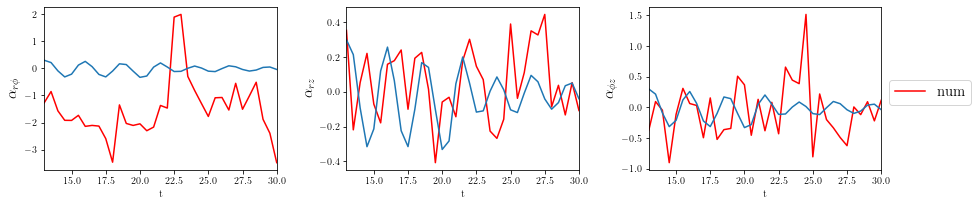

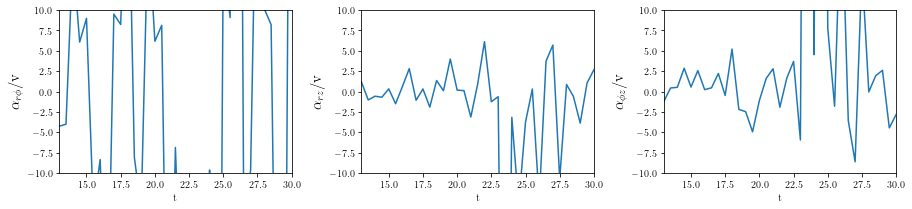

In [13]:
fig, ax = plt.subplots(1,3, sharex = 'all', figsize = (15,3))
plt.subplots_adjust(wspace = 0.3) 

ax[0].plot(t[26:], alpha[1,25:], label = 'num', color = 'r')
ax[1].plot(t[26:], alpha[2,25:], label = 'num', color = 'r')
ax[2].plot(t[26:], alpha[4,25:], label = 'num', color = 'r')
ax[0].plot(t[26:], v[:])
ax[1].plot(t[26:], v[:])
ax[2].plot(t[26:], v[:])
ax[0].set_ylabel(r'$\alpha_{r\phi}$', fontsize = 15)
ax[1].set_ylabel(r'$\alpha_{rz}$', fontsize = 15)
ax[2].set_ylabel(r'$\alpha_{\phi z}$', fontsize = 15)
ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[2].set_xlabel('t')
ax[0].set_xlim([13,30])
ax[2].legend(bbox_to_anchor = (1,0.6), fontsize = 15)

fig, ax = plt.subplots(1,3, sharex = 'all', figsize = (15,3))
plt.subplots_adjust(wspace = 0.3) 

ax[0].plot(t[26:], alpha[1,25:]/v)
ax[1].plot(t[26:], alpha[2,25:]/v)
ax[2].plot(t[26:], alpha[4,25:]/v)

ax[0].set_ylabel(r'$\alpha_{r\phi}$/v', fontsize = 15)
ax[1].set_ylabel(r'$\alpha_{rz}$/v', fontsize = 15)
ax[2].set_ylabel(r'$\alpha_{\phi z}$/v', fontsize = 15)
ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[2].set_xlabel('t')
ax[0].set_xlim([13,30])
ax[0].set_ylim([-10,10])
ax[1].set_ylim([-10,10])
ax[2].set_ylim([-10,10])

In [ ]:
#plots magnetic energy
t = np.linspace(0,30,61)

fig, ax = plt.subplots(2,3,sharex = 'all',sharey='none',figsize = (25,12))

plt.subplots_adjust(hspace = 0.1) 
plt.subplots_adjust(wspace = 0.05) 

energ_blow2 = energ_blow-energ_blow[0]
energ_bmed2 = energ_bmed-energ_bmed[0]
energ_bhigh2 = energ_bhigh-energ_bhigh[0]
energ_rlow2 = energ_rlow-energ_rlow[0]
energ_rmed2 = energ_rmed-energ_rmed[0]


for i in range(0,2):
    for j in range(0,3):
        ax[i,j].tick_params(axis='y',labelsize = 20)
        ax[i,j].tick_params(axis='x',labelsize = 20)

ax[0,0].plot(t[5:],energ_blow2[5:,0], linewidth = 1.2, linestyle = 'solid', color = 'mediumorchid', label = r'MRI-H3')
ax[0,0].plot(t[5:],energ_bmed2[5:,0], linewidth = 1.2, linestyle = 'dashdot', color = 'mediumslateblue', label = r'MRI-H2')
ax[0,0].plot(t[5:],energ_bhigh2[5:,0], linewidth = 1.2, linestyle = 'dashed', color = 'darkblue', label = r'MRI-H1')

#ax[0,0].text(26,5e24,r'$e^{\rm mag}_{r}$', fontsize = 26)
ax[0,0].set_ylabel(r'$e^{\rm mag}_i$', fontsize = 24)
#ax[0,0].set_xlabel('Time', fontsize = 15)
#ax[0,0].set_yscale('log')
#ax[0,0].set_ylim([1e21,5e30])
#ax[0,0].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[0].set_xscale('log')
ax[0,0].legend(loc = 'lower right', fontsize = 18)

ax[0,1].plot(t[5:],energ_blow2[5:,1], linewidth = 1.2, linestyle = 'solid', color = 'mediumorchid', label = r'MRI-H3')
ax[0,1].plot(t[5:],energ_bmed2[5:,1], linewidth = 1.2, linestyle = 'dashdot', color = 'mediumslateblue', label = r'MRI-H2')
ax[0,1].plot(t[5:],energ_bhigh2[5:,1], linewidth = 1.2, linestyle = 'dashed', color = 'darkblue', label = r'MRI-H1')

#ax[0,1].text(26,5e24,r'$e^{\rm mag}_{\rm \phi}$', fontsize = 26)
#ax[0,1].set_xlabel('Time', fontsize = 15)
#ax[0,1].set_yscale('log')
#ax[0,1].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[1].set_xscale('log')
ax[0,1].legend(loc = 'lower right', fontsize = 18)

ax[0,2].plot(t[5:],energ_blow2[5:,2], linewidth = 1.2, linestyle = 'solid', color = 'mediumorchid', label = r'MRI-H3')
ax[0,2].plot(t[5:],energ_bmed2[5:,2], linewidth = 1.2, linestyle = 'dashdot', color = 'mediumslateblue', label = r'MRI-H2')
ax[0,2].plot(t[5:],energ_bhigh2[5:,2], linewidth = 1.2, linestyle = 'dashed', color = 'darkblue', label = r'MRI-H1')

#ax[0,2].text(26,5e24,r'$e^{\rm mag}_{z}$', fontsize = 26)
#ax[0,2].set_xlabel('Time', fontsize = 15)
#ax[0,2].set_yscale('log')
#ax[0,2].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[2].set_xscale('log')
ax[0,2].legend(loc = 'lower right', fontsize = 18)

ax[1,0].plot(t[5:],energ_rlow2[5:,0], linewidth = 1.2, linestyle = 'solid', color = 'mediumorchid', label = r'MRI-L1')
ax[1,0].plot(t[5:],energ_rmed2[5:,0], linewidth = 1.2, linestyle = 'dashdot', color = 'mediumslateblue', label = r'MRI-M1')
ax[1,0].plot(t[5:],energ_bhigh2[5:,0], linewidth = 1.2, linestyle = 'dashed', color = 'darkblue', label = r'MRI-H1')

ax[1,0].set_ylabel(r'$e^{\rm mag}_i$', fontsize = 24)
ax[1,0].set_xlabel('Time [ms]', fontsize = 22)
#ax[1,0].text(26,5e24,r'$e^{\rm mag}_{r}$', fontsize = 26)
#ax[1,0].set_yscale('log')
#ax[1,0].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[0].set_xscale('log')
ax[1,0].legend(loc = 'lower right', fontsize = 18)

ax[1,1].plot(t[5:],energ_rlow2[5:,1], linewidth = 1.2, linestyle = 'solid', color = 'mediumorchid', label = r'MRI-L1')
ax[1,1].plot(t[5:],energ_rmed2[5:,1], linewidth = 1.2, linestyle = 'dashdot', color = 'mediumslateblue', label = r'MRI-M1')
ax[1,1].plot(t[5:],energ_bhigh2[5:,1], linewidth = 1.2, linestyle = 'dashed', color = 'darkblue', label = r'MRI-H1')

ax[1,1].set_xlabel('Time [ms]', fontsize = 22)
#ax[1,1].text(26,5e24,r'$e^{\rm mag}_{\rm \phi}$', fontsize = 26)
#ax[1,1].set_yscale('log')
#ax[1,1].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[1].set_xscale('log')
ax[1,1].legend(loc = 'lower right', fontsize = 18)

ax[1,2].plot(t[5:],energ_rlow2[5:,2], linewidth = 1.2, linestyle = 'solid', color = 'mediumorchid', label = r'MRI-L1')
ax[1,2].plot(t[5:],energ_rmed2[5:,2], linewidth = 1.2, linestyle = 'dashdot', color = 'mediumslateblue', label = r'MRI-M1')
ax[1,2].plot(t[5:],energ_bhigh2[5:,2], linewidth = 1.2, linestyle = 'dashed', color = 'darkblue', label = r'MRI-H1')

ax[1,2].set_xlabel('Time [ms]', fontsize = 22)
#ax[1,2].text(26,5e24,r'$e^{\rm mag}_{z}$', fontsize = 26)
#ax[1,2].set_yscale('log')
#ax[1,2].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[2].set_xscale('log')
ax[1,2].legend(loc = 'lower right', fontsize = 18)

#plt.savefig('/home/miquelmiravet/Desktop/figs_mri/mri_energy_mag_comp.pdf',bbox_inches = 'tight')
plt.show()